In [2]:
import tt
import numpy as np
import experiments_stuff
import bilinear_package.src.primitives as primitives

In [27]:
create_inverse_index_sums(20, 5)

This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=1, n(1)=20 
r(2)=1, n(2)=20 
r(3)=1, n(3)=20 
r(4)=1, n(4)=20 
r(5)=1 

This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=1, n(1)=20 
r(2)=1, n(2)=20 
r(3)=1, n(3)=20 
r(4)=1, n(4)=20 
r(5)=1 

=multifuncrs= sweep 1{2}, max_dy: 6.468e+00, erank: 4.89898
=multifuncrs= sweep 2{1}, max_dy: 4.716e-03, erank: 5.56776
=multifuncrs= sweep 2{2}, max_dy: 4.716e-03, erank: 5.6921
=multifuncrs= sweep 3{1}, max_dy: 1.437e-07, erank: 5.6921


This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=12, n(1)=20 
r(2)=6, n(2)=20 
r(3)=6, n(3)=20 
r(4)=6, n(4)=20 
r(5)=1 

In [24]:
d = 8
n = 2
nats = np.reshape(np.arange(0, d), (1, d, 1))
ones = np.reshape(np.ones(d), (1, d, 1))
base = [ones for _ in range(n)]
X = []
for i in range(n):
    kek = base.copy()
    kek[i] = nats.copy()
    X.append(tt.vector.from_list(kek))
print(X[0])
print(X[1])
c = tt.multifuncrs2(X, lambda x: 1 / (1 + x[:, 0] + x[:, 1]), eps=1E-6)
print(c.full())

c

This is a 2-dimensional tensor 
r(0)=1, n(0)=8 
r(1)=1, n(1)=8 
r(2)=1 

This is a 2-dimensional tensor 
r(0)=1, n(0)=8 
r(1)=1, n(1)=8 
r(2)=1 

=multifuncrs= sweep 1{2}, max_dy: 1.857e+01, erank: 2.44949
=multifuncrs= sweep 2{1}, max_dy: 5.977e-08, erank: 2.82843
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1       ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667]]


This is a 2-dimensional tensor 
r(0)=1, n(0)=8 
r(1)=8, n(1)=8 
r(2)=1 

In [3]:
a = experiments_stuff.get_tensor_for_experiment(5, 20, 20, 5, 23)
b = experiments_stuff.get_tensor_for_experiment(5, 20, 20, 5, 24)
a1 = tt.vector.from_list(a)
b1 = tt.vector.from_list(b)

In [4]:
from bilinear_package.src.hadamard_product import generalizedApproximateHadamardProduct

In [5]:
import time
answer1 = []
answer2 = []
answer3 = []
answer4 = []
grid = range(10, 61, 10)
for rank in grid:
    a = experiments_stuff.get_tensor_for_experiment(5, 20, rank, 5, 23 * rank + rank)
    b = experiments_stuff.get_tensor_for_experiment(5, 20, rank, 5, 24 * rank + rank)
    r = experiments_stuff.get_random_tensor_for_experiment(5, 20, rank, 38 * rank + rank)
    a1 = tt.vector.from_list(a)
    b1 = tt.vector.from_list(b)
    precise = tt.vector.to_list(a1 * b1)
    print(f'{rank} a')
    full_prod = a1 * b1
    time1 = time.time()
    tensor = (a1 * b1).round(0, rank)
    time2 = time.time()
    print(f'{rank} b')
    answer1.append(primitives.ttTensorsUnsymmetricalRelativeComparance(tt.vector.to_list(tensor), precise))
    print(f'{rank} c')
    time3 = time.time()
    tensor = generalizedApproximateHadamardProduct(a, b, r)
    time4 = time.time()
    print(f'{rank} d')
    answer2.append(primitives.ttTensorsUnsymmetricalRelativeComparance(tensor, precise))
    answer3.append(time2 - time1)
    answer4.append(time4 - time3)
    print()

10 a
10 b
10 c
10 d

20 a
20 b
20 c
20 d

30 a
30 b
30 c
30 d


KeyboardInterrupt: 

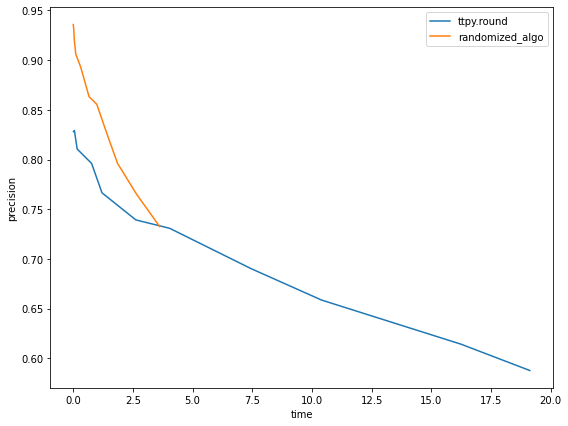

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("time")
ax.set_ylabel("precision")
ax.plot(answer3, answer1, label="ttpy.round")
ax.plot(answer4, answer2, label="randomized_algo")
ax.legend()

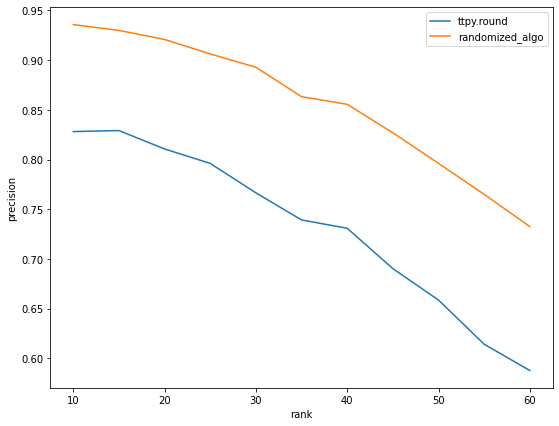

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("rank")
ax.set_ylabel("precision")
ax.plot(range(10, 61, 5), answer1, label="ttpy.round")
ax.plot(range(10, 61, 5), answer2, label="randomized_algo")
ax.legend()

In [305]:
np.linalg.norm(a1.full()) - tt.vector.norm(a1)

0.0

In [310]:
%load_ext autoreload

In [317]:
%autoreload 2

from bilinear_package.src import primitives


tt.vector.norm(a1) - primitives.countFrobeniusNorm(a)

0.0

In [293]:
p1 = tt.multifuncrs2(X = [a1, b1], funs = lambda x: np.prod(x, axis=1), eps = 1e-6)

=multifuncrs= sweep 1{2}, max_dy: 1.262e+01, erank: 4.89898
=multifuncrs= sweep 2{1}, max_dy: 1.209e+00, erank: 8.77496
=multifuncrs= sweep 2{2}, max_dy: 1.209e+00, erank: 12.6491
=multifuncrs= sweep 3{1}, max_dy: 1.294e+00, erank: 16.389
=multifuncrs= sweep 3{2}, max_dy: 1.294e+00, erank: 19.4474
=multifuncrs= sweep 4{1}, max_dy: 1.239e+00, erank: 21.9135
=multifuncrs= sweep 4{2}, max_dy: 1.326e+00, erank: 24.3352
=multifuncrs= sweep 5{1}, max_dy: 1.323e+00, erank: 26.7245
=multifuncrs= sweep 5{2}, max_dy: 1.323e+00, erank: 29.0895
=multifuncrs= sweep 6{1}, max_dy: 1.261e+00, erank: 31.4356
=multifuncrs= sweep 6{2}, max_dy: 1.261e+00, erank: 33.7668
=multifuncrs= sweep 7{1}, max_dy: 1.306e+00, erank: 36.086
=multifuncrs= sweep 7{2}, max_dy: 1.306e+00, erank: 38.3953
=multifuncrs= sweep 8{1}, max_dy: 1.292e+00, erank: 40.6964
=multifuncrs= sweep 8{2}, max_dy: 1.292e+00, erank: 42.9907
=multifuncrs= sweep 9{1}, max_dy: 1.355e+00, erank: 45.2791
=multifuncrs= sweep 9{2}, max_dy: 1.355e+0

In [296]:
tt.vector.norm(p1 - a1 * b1) / tt.vector.norm(a1 * b1)

2.982175601373386

=multifuncrs= sweep 1{2}, max_dy: 1.405e+00, erank: 4.89898
=multifuncrs= sweep 2{1}, max_dy: 1.091e+00, erank: 8.63713
=multifuncrs= sweep 2{2}, max_dy: 1.261e+00, erank: 11.6705
=multifuncrs= sweep 3{1}, max_dy: 1.078e+00, erank: 14.0784
=multifuncrs= sweep 3{2}, max_dy: 1.147e+00, erank: 16.4378
=multifuncrs= sweep 4{1}, max_dy: 1.032e+00, erank: 18.767
=multifuncrs= sweep 4{2}, max_dy: 1.032e+00, erank: 21.0761
=multifuncrs= sweep 5{1}, max_dy: 9.814e-01, erank: 23.3709
=multifuncrs= sweep 5{2}, max_dy: 9.814e-01, erank: 25.6554
=multifuncrs= sweep 6{1}, max_dy: 8.879e-01, erank: 27.9321
=multifuncrs= sweep 6{2}, max_dy: 8.879e-01, erank: 30.2026
=multifuncrs= sweep 7{1}, max_dy: 6.687e-01, erank: 32.4684
=multifuncrs= sweep 7{2}, max_dy: 6.687e-01, erank: 34.2783
=multifuncrs= sweep 8{1}, max_dy: 5.044e-01, erank: 34.2783
=multifuncrs= sweep 8{2}, max_dy: 5.044e-01, erank: 34.2783
=multifuncrs= sweep 9{1}, max_dy: 4.724e-01, erank: 34.2783
=multifuncrs= sweep 9{2}, max_dy: 5.050e-

In [196]:
(a1 * b1).round(0, 60)

This is a 5-dimensional tensor 
r(0)=1, n(0)=10 
r(1)=10, n(1)=10 
r(2)=60, n(2)=10 
r(3)=60, n(3)=10 
r(4)=10, n(4)=10 
r(5)=1 

In [216]:
tt.vector.norm((a1 * b1).round(0, 90) - a1 * b1) / tt.vector.norm(a1 * b1)

0.019661225004602153

In [233]:
for _ in range(20):
    answer = []
    for rank in range(10, 401, 10):
        answer.append(tt.vector.norm((a1 * b1).round(0, rank) - a1 * b1) / tt.vector.norm(a1 * b1))

In [259]:
import time
answer1 = []
answer2 = []
answer3 = []
answer4 = []
for rank in range(10, 401, 10):
    time1 = time.time()
    answer1.append(tt.vector.norm((a1 * b1).round(0, rank) - a1 * b1) / tt.vector.norm(a1 * b1))
    time2 = time.time()
    r = experiments_stuff.get_random_tensor_for_experiment(5, 20, rank, 38)
    tensor = generalizedApproximateHadamardProduct(a, b, r)
    answer2.append(tt.vector.norm(tt.vector.from_list(tensor) - a1 * b1) / tt.vector.norm(a1 * b1))
    time3 = time.time()
    answer3.append(time2 - time1)
    answer4.append(time3 - time2)
    print(rank)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [286]:
for rank in range(10, 401, 10):
    tensor = tt.multifuncrs2(X = [a1, b1], funs = lambda x: x[:, 0] * x[:, 1], eps = 1e-6)
    print(tt.vector.norm(tensor - a1 * b1) / tt.vector.norm(a1 * b1))

=multifuncrs= sweep 1{2}, max_dy: 6.778e+00, erank: 4.89898
=multifuncrs= sweep 2{1}, max_dy: 1.302e+00, erank: 8.77496
=multifuncrs= sweep 2{2}, max_dy: 1.302e+00, erank: 12.6491
=multifuncrs= sweep 3{1}, max_dy: 1.410e+00, erank: 16.389
=multifuncrs= sweep 3{2}, max_dy: 1.410e+00, erank: 19.4474
=multifuncrs= sweep 4{1}, max_dy: 1.155e+00, erank: 21.9135
=multifuncrs= sweep 4{2}, max_dy: 1.254e+00, erank: 24.3352
=multifuncrs= sweep 5{1}, max_dy: 1.239e+00, erank: 26.7245
=multifuncrs= sweep 5{2}, max_dy: 1.283e+00, erank: 29.0895
=multifuncrs= sweep 6{1}, max_dy: 1.251e+00, erank: 31.4356
=multifuncrs= sweep 6{2}, max_dy: 1.320e+00, erank: 33.7668
=multifuncrs= sweep 7{1}, max_dy: 1.259e+00, erank: 36.086
=multifuncrs= sweep 7{2}, max_dy: 1.323e+00, erank: 38.3953
=multifuncrs= sweep 8{1}, max_dy: 1.349e+00, erank: 40.6964
=multifuncrs= sweep 8{2}, max_dy: 1.349e+00, erank: 42.9907
=multifuncrs= sweep 9{1}, max_dy: 1.275e+00, erank: 45.2791
=multifuncrs= sweep 9{2}, max_dy: 1.323e+0

KeyboardInterrupt: 

In [280]:
answer5 = []
answer6 = []
for rank in range(10, 401, 10):
    time1 = time.time()
    tensor = tt.multifuncrs2(X = [a1, b1], funs = lambda x: np.prod(x, axis=1), eps = 1e-6, rmax=rank)
    answer5.append(tt.vector.norm(tensor - a1 * b1) / tt.vector.norm(a1 * b1))
    time2 = time.time()
    answer6.append(time2 - time1)
    print(rank)

=multifuncrs= sweep 1{2}, max_dy: 7.440e+00, erank: 4.89898
=multifuncrs= sweep 2{1}, max_dy: 1.361e+00, erank: 8.77496
=multifuncrs= sweep 2{2}, max_dy: 1.361e+00, erank: 11.8743
=multifuncrs= sweep 3{1}, max_dy: 1.434e+00, erank: 11.8743
=multifuncrs= sweep 3{2}, max_dy: 1.434e+00, erank: 11.8743
=multifuncrs= sweep 4{1}, max_dy: 1.233e+00, erank: 11.8743
=multifuncrs= sweep 4{2}, max_dy: 1.436e+00, erank: 11.8743
=multifuncrs= sweep 5{1}, max_dy: 1.225e+00, erank: 11.8743
=multifuncrs= sweep 5{2}, max_dy: 1.318e+00, erank: 11.8743
=multifuncrs= sweep 6{1}, max_dy: 1.273e+00, erank: 11.8743
=multifuncrs= sweep 6{2}, max_dy: 1.273e+00, erank: 11.8743
=multifuncrs= sweep 7{1}, max_dy: 1.273e+00, erank: 11.8743
=multifuncrs= sweep 7{2}, max_dy: 1.273e+00, erank: 11.8743
=multifuncrs= sweep 8{1}, max_dy: 1.371e+00, erank: 11.8743
=multifuncrs= sweep 8{2}, max_dy: 1.382e+00, erank: 11.8743
=multifuncrs= sweep 9{1}, max_dy: 1.257e+00, erank: 11.8743
=multifuncrs= sweep 9{2}, max_dy: 1.338e

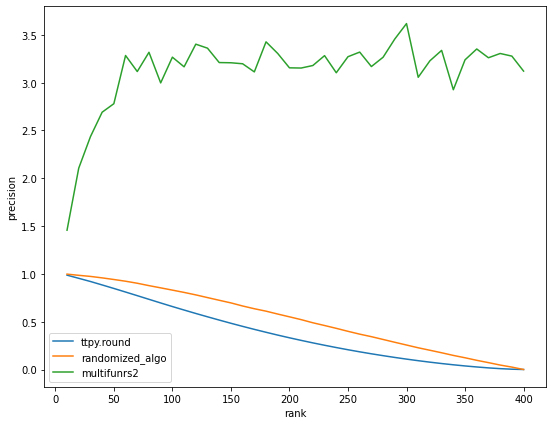

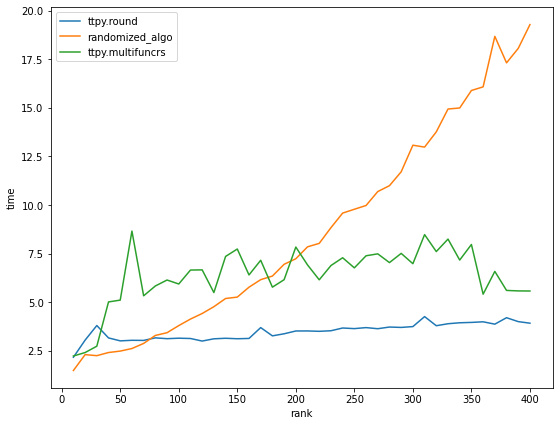

In [282]:
fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("rank")
ax.set_ylabel("time")
ax.plot(range(10, 401, 10), answer3, label="ttpy.round")
ax.plot(range(10, 401, 10), answer4, label="randomized_algo")
ax.plot(range(10, 401, 10), answer6, label="ttpy.multifuncrs")
ax.legend()

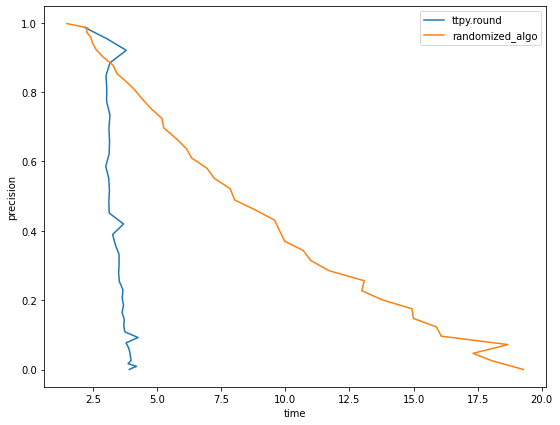

In [272]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("time")
ax.set_ylabel("precision")
ax.plot(answer3, answer1, label="ttpy.round")
ax.plot(answer4, answer2, label="randomized_algo")
ax.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(10, 401, 10), answer3)
plt.plot(range(10, 401, 10), answer4)

In [240]:
answer

[0.9896362124572566,
 0.9357584967747583,
 0.8775524940154369,
 0.83110435289518,
 0.7731604611335031,
 0.7093257280941808,
 0.6481983943608981,
 0.5960682959853078,
 0.5409967358568527,
 0.46702455762847955,
 0.3958012510869696,
 0.34193896902437654,
 0.30483887092836204,
 0.25485159047923533,
 0.2103491448344994,
 0.15931727333315981,
 0.1183453407163426,
 0.0737417232162729,
 0.0391101897611546,
 7.042881970617376e-15]

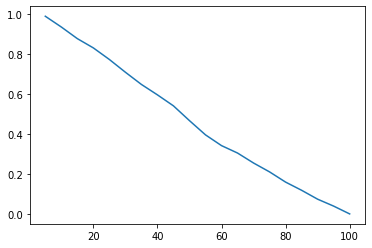

In [239]:
plt.plot(range(5, 101, 5), answer)